In [ ]:
# export pythonhashseed = 9

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import sklearn
from sklearn.base import clone
import shap
import re
import xgboost
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score, roc_curve, auc,precision_recall_curve
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC, NuSVC
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from matplotlib.colors import LinearSegmentedColormap
from sklearn.calibration import calibration_curve
from statkit.decision import NetBenefitDisplay
%matplotlib inline

In [4]:
!python --version

Python 3.12.2


In [5]:
print(sklearn.__version__)
print(shap.__version__)
print(xgboost.__version__)

1.4.0
0.45.0
2.1.1


In [9]:
mydata=pd.read_excel('OneDrive - Lightning Life/data/汇总表.xlsx')

In [11]:
mydata.head()

,Patient,"Sex(male=1,female=0)",Age,Location(1BJ;2XM;3GZ),HIV,Serum NTT,Serum TT,CSF NTT,CSF TT,CSF WBC,CSF Protein,NS Symptom/Sign (with=1;without 0),UpToDate (NS=1;NNS=0),EURO2020(NS=1;NNS=0),US2021(NS=1;PNS=2;NNS=0),China2021(NS=1;PNS=2;NNS=0),US CDC2018(NS=1;PNS=2;LNS=3;NNS=0),NT Aust2022(NS=1;PNS=2;NNS=0)
0,1,0,31,1,0,8,1,0,1,3.0,165.71,0,0,0,0,0,0,0
1,3,0,44,1,0,8,1,0,1,12.0,122.72,0,1,0,0,0,0,0
2,4,0,32,1,0,8,1,0,1,4.0,139.12,0,0,0,0,0,0,0
3,5,1,56,1,0,1,1,0,0,7.0,370.79,1,1,1,2,2,2,2
4,6,0,53,1,0,0,1,0,0,2.0,101.50,0,0,0,0,0,0,0


In [13]:
mydata.shape

(1633, 18)

In [15]:
mydata.columns=['ID','Sex','Age','Location','HIV','Serum_NTT','Serum_TT','CSF_NTT','CSF_TT',
              'CSF_WBC','CSF_Protein','NS_Symptom','UpToDate','EURO2020',
              'US2021','China2021','US2018','Aust2022']

In [17]:
mydata.head()

,ID,Sex,Age,Location,HIV,Serum_NTT,Serum_TT,CSF_NTT,CSF_TT,CSF_WBC,CSF_Protein,NS_Symptom,UpToDate,EURO2020,US2021,China2021,US2018,Aust2022
0,1,0,31,1,0,8,1,0,1,3.0,165.71,0,0,0,0,0,0,0
1,3,0,44,1,0,8,1,0,1,12.0,122.72,0,1,0,0,0,0,0
2,4,0,32,1,0,8,1,0,1,4.0,139.12,0,0,0,0,0,0,0
3,5,1,56,1,0,1,1,0,0,7.0,370.79,1,1,1,2,2,2,2
4,6,0,53,1,0,0,1,0,0,2.0,101.50,0,0,0,0,0,0,0


In [19]:
mydata.describe()

,ID,Sex,Age,Location,HIV,Serum_TT,CSF_WBC,CSF_Protein,NS_Symptom,UpToDate,EURO2020,US2021,China2021,US2018,Aust2022
count,1633.000000,1633.000000,1633.000000,1633.000000,1633.0,1633.0,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000
mean,947.062462,0.529088,45.767299,2.090631,0.0,1.0,55.778077,383.290441,0.476424,0.694427,0.296387,0.417024,0.290876,0.815677,0.517453
std,566.422302,0.499306,15.035896,0.830111,0.0,0.0,1468.986624,359.740303,0.499597,0.460791,0.456804,0.696194,0.535981,1.120639,0.769259
min,1.000000,0.000000,1.000000,1.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,473.000000,0.000000,33.000000,1.000000,0.0,1.0,1.000000,181.380000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,889.000000,1.000000,46.000000,2.000000,0.0,1.0,3.000000,295.980000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1450.000000,1.000000,57.000000,3.000000,0.0,1.0,9.000000,460.400000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1943.000000,1.000000,90.000000,3.000000,0.0,1.0,59099.000000,4617.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,2.000000


In [21]:
mydata.loc[mydata.Serum_NTT!=0,'Serum_NTT']=1
mydata.loc[mydata.CSF_NTT!=0,'CSF_NTT']=1
mydata.loc[mydata.CSF_TT!=0,'CSF_TT']=1

mydata.loc[mydata.US2018!=0,'US2018']=1
mydata.loc[mydata.US2021!=0,'US2021']=1
mydata.loc[mydata.China2021!=0,'China2021']=1
mydata.loc[mydata.Aust2022!=0,'Aust2022']=1

In [23]:
mydata[["Serum_NTT", "CSF_NTT","CSF_TT"]] = mydata[["Serum_NTT", "CSF_NTT","CSF_TT"]].apply(pd.to_numeric)

In [25]:
mydata.describe()

,ID,Sex,Age,Location,HIV,Serum_NTT,Serum_TT,CSF_NTT,CSF_TT,CSF_WBC,CSF_Protein,NS_Symptom,UpToDate,EURO2020,US2021,China2021,US2018,Aust2022
count,1633.000000,1633.000000,1633.000000,1633.000000,1633.0,1633.000000,1633.0,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000
mean,947.062462,0.529088,45.767299,2.090631,0.0,0.894060,1.0,0.208206,0.485609,55.778077,383.290441,0.476424,0.694427,0.296387,0.296387,0.250459,0.418249,0.346601
std,566.422302,0.499306,15.035896,0.830111,0.0,0.307855,0.0,0.406149,0.499946,1468.986624,359.740303,0.499597,0.460791,0.456804,0.456804,0.433410,0.493423,0.476033
min,1.000000,0.000000,1.000000,1.000000,0.0,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,473.000000,0.000000,33.000000,1.000000,0.0,1.000000,1.0,0.000000,0.000000,1.000000,181.380000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,889.000000,1.000000,46.000000,2.000000,0.0,1.000000,1.0,0.000000,0.000000,3.000000,295.980000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1450.000000,1.000000,57.000000,3.000000,0.0,1.000000,1.0,0.000000,1.000000,9.000000,460.400000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1943.000000,1.000000,90.000000,3.000000,0.0,1.000000,1.0,1.000000,1.000000,59099.000000,4617.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
guangzhou=mydata.loc[mydata.Location==3,:]
xia=mydata.loc[mydata.Location==2,:]
beijing=mydata.loc[mydata.Location==1,:]
guangzhou.reset_index(drop=True,inplace=True)
xia.reset_index(drop=True,inplace=True)
beijing.reset_index(drop=True,inplace=True)

In [29]:
xia.shape

(495, 18)

In [31]:
guangzhou.head()

,ID,Sex,Age,Location,HIV,Serum_NTT,Serum_TT,CSF_NTT,CSF_TT,CSF_WBC,CSF_Protein,NS_Symptom,UpToDate,EURO2020,US2021,China2021,US2018,Aust2022
0,1169,0,20,3,0,1,1,0,0,0.0,423.0,0,0,0,0,0,0,0
1,1173,0,51,3,0,1,1,0,0,1.0,262.0,0,0,0,0,0,0,0
2,1174,1,38,3,0,1,1,0,1,3.0,125.0,0,0,0,0,0,0,0
3,1175,1,60,3,0,1,1,0,1,1.9,375.0,1,1,0,0,0,1,1
4,1176,1,23,3,0,1,1,0,1,0.0,422.0,0,0,0,0,0,0,0


In [33]:
xia.head()

,ID,Sex,Age,Location,HIV,Serum_NTT,Serum_TT,CSF_NTT,CSF_TT,CSF_WBC,CSF_Protein,NS_Symptom,UpToDate,EURO2020,US2021,China2021,US2018,Aust2022
0,564,0,47,2,0,1,1,1,1,2.0,210.1,1,1,1,1,0,1,1
1,565,0,56,2,0,1,1,1,1,163.0,493.7,1,1,1,1,1,1,1
2,566,1,58,2,0,1,1,0,1,6.0,269.3,0,1,0,0,0,0,0
3,567,1,44,2,0,1,1,0,0,0.0,548.0,1,1,1,1,1,1,1
4,568,1,53,2,0,1,1,1,1,11.0,283.0,1,1,1,1,1,1,1


In [35]:
beijing.head()

,ID,Sex,Age,Location,HIV,Serum_NTT,Serum_TT,CSF_NTT,CSF_TT,CSF_WBC,CSF_Protein,NS_Symptom,UpToDate,EURO2020,US2021,China2021,US2018,Aust2022
0,1,0,31,1,0,1,1,0,1,3.0,165.71,0,0,0,0,0,0,0
1,3,0,44,1,0,1,1,0,1,12.0,122.72,0,1,0,0,0,0,0
2,4,0,32,1,0,1,1,0,1,4.0,139.12,0,0,0,0,0,0,0
3,5,1,56,1,0,1,1,0,0,7.0,370.79,1,1,1,1,1,1,1
4,6,0,53,1,0,0,1,0,0,2.0,101.50,0,0,0,0,0,0,0


In [37]:
def mlmodel(data,x,y,x_standard=None,imbalanced=False,imbalanced_method='ADASYN',random_state=2023,
            classifier='RF',
            hyperparameter={
            'classifier__n_estimators':range(50,200,50),
            'classifier__max_depth':range(3,12,3),
            'classifier__min_samples_split':range(20,100,15)},test_size=0.3):
    # arrange x_standard in the first several columns in the data
    x_train_o,x_test,y_train_o,y_test=train_test_split(data[x],data[y],test_size=test_size,random_state=random_state)
    x_train,y_train=x_train_o,y_train_o
    
    if imbalanced is True:
        if imbalanced_method =='ADASYN':
            im=ADASYN(random_state=random_state)
        
        x_train, y_train=im.fit_resample(x_train, y_train)
    a=StandardScaler()
    columns_to_keep=list(set(x)-set(x_standard))
    preprocessor = ColumnTransformer(
    transformers=[
        ('x_standard', a, x_standard),
        ('', 'passthrough', columns_to_keep)
    ],verbose_feature_names_out=True)

    if classifier =='RF':
        
        ml=RandomForestClassifier(bootstrap=True,random_state=random_state,warm_start=False,
                                                    class_weight='balanced',max_samples=0.9)
    if classifier =='SVC':
        ml=SVC(class_weight='balanced',random_state=random_state,probability=True)
        
    if classifier =='NuSVC':
        ml=NuSVC(class_weight='balanced',random_state=random_state,probability=True)
    
    if classifier =='Adacf':
        
        rf_classifier = RandomForestClassifier(bootstrap=True,random_state=random_state,warm_start=False,
                                                    class_weight='balanced',max_samples=0.9)
        ml = AdaBoostClassifier(estimator=rf_classifier, random_state=random_state,algorithm='SAMME')
    
    if classifier =='xgb':
        ml=XGBClassifier(objective='binary:logistic')

    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', ml)])
    
    gd = RandomizedSearchCV(estimator=clf,random_state=random_state,
                                  param_distributions=hyperparameter,
                                  n_jobs=1,
                                  cv=3,
                                  verbose=True)
    gd.fit(x_train, y_train)
    return gd,x_train,y_train,x_test,y_test

In [39]:
newCmap = LinearSegmentedColormap.from_list("", ['#c4cfd4','#faa732'])

In [41]:
import rpy2.robjects as ro
import numpy as np
from rpy2.robjects.numpy2ri import activate, numpy2rpy
activate()
ro.r('library(pROC)')
ro.r('''
    calc_auc_ci <- function(y_true, y_scores) {
        roc_obj <- roc(y_true, y_scores)
        ci(roc_obj)
    }
''')

R[write to console]: Type 'citation("pROC")' for a citation.

R[write to console]: 
Attaching package: ‘pROC’


R[write to console]: The following objects are masked from ‘package:stats’:

    cov, smooth, var




# Task 1

## All variables

In [43]:
x=['Age','CSF_TT','Sex','Serum_TT','Serum_NTT',
              'CSF_WBC','CSF_Protein','NS_Symptom']

In [45]:
hyperparameter = {
    'classifier__n_estimators': [20, 50,70,90,120,150], 
    'classifier__max_depth': [2, 3, 5], 
    'classifier__gamma': [0, 1, 5, 10], 
    'classifier__learning_rate': [0.1, 0.3,0.5,0.7, 1.0]
}

model_xgb_CSFNTT,x_train,y_train,x_test,y_test=mlmodel(data=guangzhou,x=x,hyperparameter=hyperparameter,
              y='CSF_NTT',x_standard=['CSF_WBC','Age','CSF_Protein'],imbalanced=False,random_state=2024,
                         classifier='xgb',test_size=0.3)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


R[write to console]: Setting levels: control = 0, case = 1

R[write to console]: Setting direction: controls < cases

R[write to console]: Setting levels: control = 0, case = 1

R[write to console]: Setting direction: controls < cases

R[write to console]: Setting levels: control = 0, case = 1

R[write to console]: Setting direction: controls < cases

R[write to console]: Setting levels: control = 0, case = 1

R[write to console]: Setting direction: controls < cases



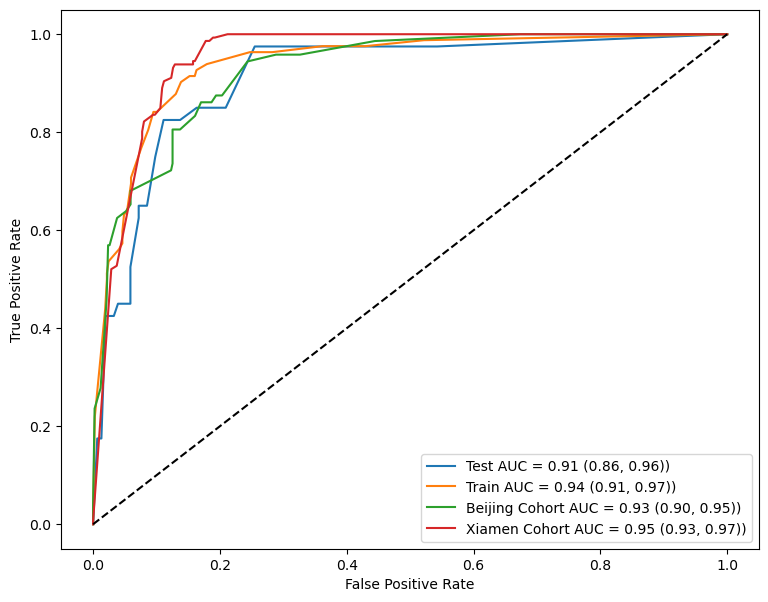

In [47]:

bestmodel=model_xgb_CSFNTT.best_estimator_
y_train_pred_proba = bestmodel.predict_proba(x_train)[:, 1]
y_test_pred_proba = bestmodel.predict_proba(x_test)[:, 1] 
beijing_pred_proba = bestmodel.predict_proba(beijing)[:, 1] 
xia_pred_proba = bestmodel.predict_proba(xia)[:, 1] 

y_train_pred = bestmodel.predict(x_train)
y_test_pred = bestmodel.predict(x_test)
beijing_pred = bestmodel.predict(beijing)
xia_pred = bestmodel.predict(xia)

auc_test = roc_auc_score(y_test, y_test_pred_proba)
auc_train = roc_auc_score(y_train, y_train_pred_proba)
auc_beijing = roc_auc_score(beijing.CSF_NTT, beijing_pred_proba)
auc_xia = roc_auc_score(xia.CSF_NTT, xia_pred_proba)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred_proba)
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred_proba)
fpr_beijing, tpr_beijing, thresholds_beijing = roc_curve(beijing.CSF_NTT, beijing_pred_proba)
fpr_xia, tpr_xia, thresholds_xia = roc_curve(xia.CSF_NTT, xia_pred_proba)


outcome='CSF_NTT'
y_train_r = numpy2rpy(y_train)
y_test_r = numpy2rpy(y_test)
beijing_r = numpy2rpy(beijing[outcome])
xia_r = numpy2rpy(xia[outcome])

y_train_prob_r = numpy2rpy(y_train_pred_proba)
y_test_prob_r = numpy2rpy(y_test_pred_proba)
beijing_prob_r = numpy2rpy(beijing_pred_proba)
xia_prob_r = numpy2rpy(xia_pred_proba)

y_train_auc_ci = ro.r['calc_auc_ci'](y_train_r, y_train_prob_r)
y_test_auc_ci = ro.r['calc_auc_ci'](y_test_r, y_test_prob_r)
beijing_auc_ci = ro.r['calc_auc_ci'](beijing_r, beijing_prob_r)
xia_auc_ci = ro.r['calc_auc_ci'](xia_r, xia_prob_r)

plt.figure(figsize=[9,7])
plt.plot(fpr_test, tpr_test, label='Test AUC = %0.2f (%0.2f, %0.2f))' % (auc_test, y_test_auc_ci[0],y_test_auc_ci[2]))
plt.plot(fpr_train, tpr_train, label='Train AUC = %0.2f (%0.2f, %0.2f))' % (auc_train, y_train_auc_ci[0],y_train_auc_ci[2]))

plt.plot(fpr_beijing, tpr_beijing, label='Beijing Cohort AUC = %0.2f (%0.2f, %0.2f))' % 
         (auc_beijing, beijing_auc_ci[0],beijing_auc_ci[2]))
plt.plot(fpr_xia, tpr_xia, label='Xiamen Cohort AUC = %0.2f (%0.2f, %0.2f))' % 
         (auc_xia, xia_auc_ci[0],xia_auc_ci[2]))

plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title('CSF NTT ROC Curve')
plt.legend(loc='lower right')
plt.savefig('AUROC curve.jpg',dpi=300)

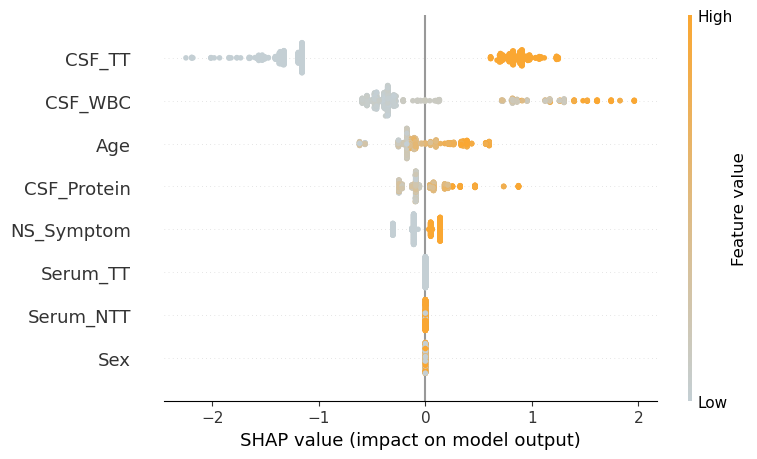

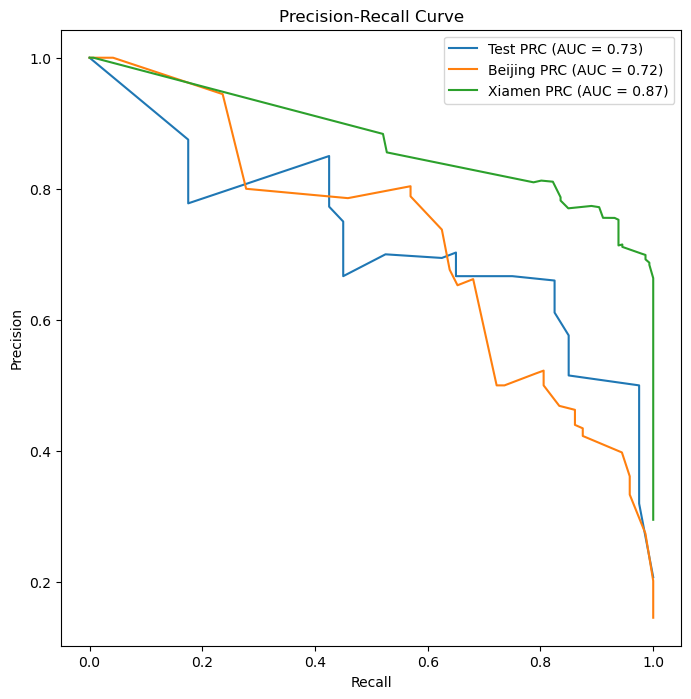

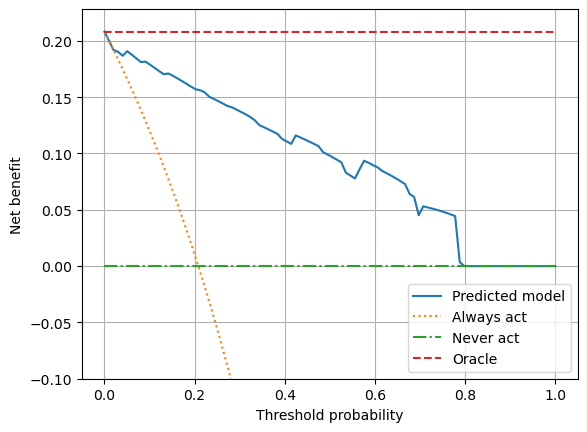

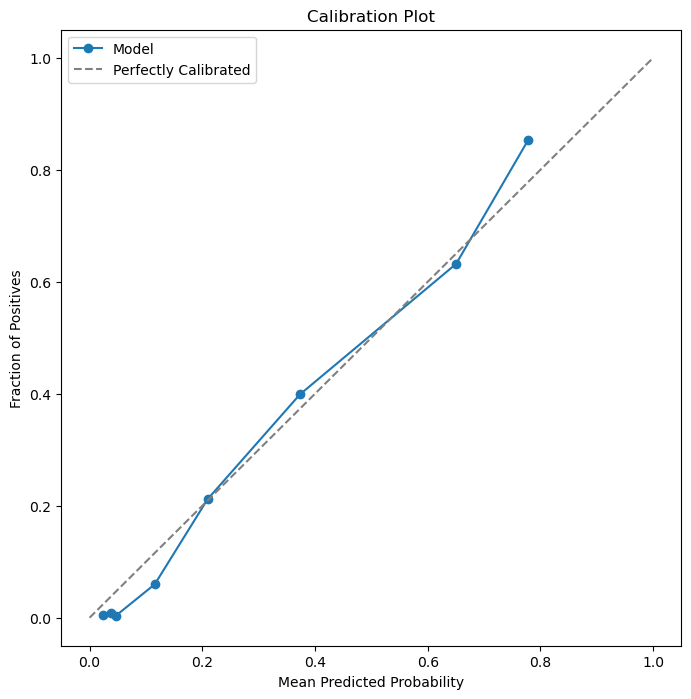

In [53]:
explainer = shap.TreeExplainer(bestmodel['classifier'])

observations = bestmodel.named_steps['preprocessor'].transform(guangzhou[x])

shap_values = explainer.shap_values(observations)


shap.summary_plot(shap_values, observations,
                 cmap=newCmap,feature_names=[re.search(r"__(.*)",var).group(1) 
                                             for var in bestmodel.named_steps['preprocessor'].get_feature_names_out() ])

precision, recall, _ = precision_recall_curve(y_test, y_test_pred_proba)
area_under_curve = auc(recall, precision)

bjprecision, bjrecall, _ = precision_recall_curve(beijing.CSF_NTT, beijing_pred_proba)
bj_area_under_curve = auc(bjrecall, bjprecision)

xiaprecision, xiarecall, _ = precision_recall_curve(xia.CSF_NTT, xia_pred_proba)
xia_area_under_curve = auc(xiarecall, xiaprecision)


plt.figure(figsize=(8, 8))
plt.plot(recall, precision, label=f'Test PRC (AUC = {area_under_curve:.2f})')
plt.plot(bjrecall, bjprecision, label=f'Beijing PRC (AUC = {bj_area_under_curve:.2f})')
plt.plot(xiarecall, xiaprecision, label=f'Xiamen PRC (AUC = {xia_area_under_curve:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

pred=bestmodel.predict_proba(mydata[x])[:, 1]
ax=plt.gca()
a=NetBenefitDisplay.from_predictions(mydata['CSF_NTT'], pred,                  #######
                                   name='Predicted model', show_references=True, ax=ax)
ax.set_ylim(-0.1, max(a.net_benefit)+0.02)
ax.grid(True)
ax.set_ylabel('Net benefit')
ax.legend(loc='lower right')
plt.show()

prob_true, prob_pred = calibration_curve(mydata['CSF_NTT'], pred, n_bins=10, strategy='quantile') #########

# 绘制校准图
plt.figure(figsize=(8, 8))
plt.plot(prob_pred, prob_true, marker='o', linestyle='-', label='Model')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')
plt.title('Calibration Plot')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.legend()
plt.show()

In [51]:
pd.DataFrame(
    {'threshold':a.threshold_probability,
     'benefit':a.net_benefit
    }
).to_excel(f'OneDrive - Lightning Life/MD/CSF_NTT_net_benefit.xlsx',index=False)

pd.DataFrame(
    {'probability true':prob_true,
     'probability prediction':prob_pred
    }
).to_excel(f'OneDrive - Lightning Life/MD/CSF_NTT_calibration.xlsx',index=False)

## Selected variables

In [55]:
x=['Age','CSF_TT','CSF_WBC']

In [57]:
hyperparameter = {
    'classifier__n_estimators': [20, 50,70,90,120,150], 
    'classifier__max_depth': [2, 3, 5], 
    'classifier__gamma': [0, 1, 5, 10], 
    'classifier__learning_rate': [0.1, 0.3,0.5,0.7, 1.0]
}

model_xgb_CSFNTT,x_train,y_train,x_test,y_test=mlmodel(data=guangzhou,x=x,hyperparameter=hyperparameter,
              y='CSF_NTT',x_standard=['CSF_WBC','Age'],imbalanced=False,random_state=2024,
                         classifier='xgb',test_size=0.3)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


R[write to console]: Setting levels: control = 0, case = 1

R[write to console]: Setting direction: controls < cases

R[write to console]: Setting levels: control = 0, case = 1

R[write to console]: Setting direction: controls < cases

R[write to console]: Setting levels: control = 0, case = 1

R[write to console]: Setting direction: controls < cases

R[write to console]: Setting levels: control = 0, case = 1

R[write to console]: Setting direction: controls < cases



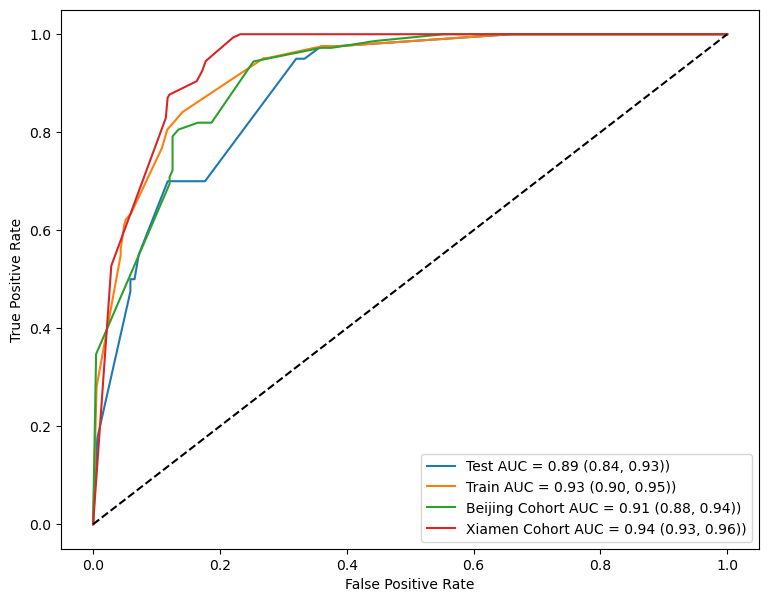

In [59]:

bestmodel=model_xgb_CSFNTT.best_estimator_
y_train_pred_proba = bestmodel.predict_proba(x_train)[:, 1]
y_test_pred_proba = bestmodel.predict_proba(x_test)[:, 1] 
beijing_pred_proba = bestmodel.predict_proba(beijing)[:, 1] 
xia_pred_proba = bestmodel.predict_proba(xia)[:, 1] 


y_train_pred = bestmodel.predict(x_train)
y_test_pred = bestmodel.predict(x_test)
beijing_pred = bestmodel.predict(beijing)
xia_pred = bestmodel.predict(xia)

auc_test = roc_auc_score(y_test, y_test_pred_proba)
auc_train = roc_auc_score(y_train, y_train_pred_proba)
auc_beijing = roc_auc_score(beijing.CSF_NTT, beijing_pred_proba)
auc_xia = roc_auc_score(xia.CSF_NTT, xia_pred_proba)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred_proba)
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred_proba)
fpr_beijing, tpr_beijing, thresholds_beijing = roc_curve(beijing.CSF_NTT, beijing_pred_proba)
fpr_xia, tpr_xia, thresholds_xia = roc_curve(xia.CSF_NTT, xia_pred_proba)

outcome='CSF_NTT'
y_train_r = numpy2rpy(y_train)
y_test_r = numpy2rpy(y_test)
beijing_r = numpy2rpy(beijing[outcome])
xia_r = numpy2rpy(xia[outcome])

y_train_prob_r = numpy2rpy(y_train_pred_proba)
y_test_prob_r = numpy2rpy(y_test_pred_proba)
beijing_prob_r = numpy2rpy(beijing_pred_proba)
xia_prob_r = numpy2rpy(xia_pred_proba)

y_train_auc_ci = ro.r['calc_auc_ci'](y_train_r, y_train_prob_r)
y_test_auc_ci = ro.r['calc_auc_ci'](y_test_r, y_test_prob_r)
beijing_auc_ci = ro.r['calc_auc_ci'](beijing_r, beijing_prob_r)
xia_auc_ci = ro.r['calc_auc_ci'](xia_r, xia_prob_r)

plt.figure(figsize=[9,7])
plt.plot(fpr_test, tpr_test, label='Test AUC = %0.2f (%0.2f, %0.2f))' % (auc_test, y_test_auc_ci[0],y_test_auc_ci[2]))
plt.plot(fpr_train, tpr_train, label='Train AUC = %0.2f (%0.2f, %0.2f))' % (auc_train, y_train_auc_ci[0],y_train_auc_ci[2]))

plt.plot(fpr_beijing, tpr_beijing, label='Beijing Cohort AUC = %0.2f (%0.2f, %0.2f))' % 
         (auc_beijing, beijing_auc_ci[0],beijing_auc_ci[2]))
plt.plot(fpr_xia, tpr_xia, label='Xiamen Cohort AUC = %0.2f (%0.2f, %0.2f))' % 
         (auc_xia, xia_auc_ci[0],xia_auc_ci[2]))

plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title('CSF NTT ROC Curve')
plt.legend(loc='lower right')
plt.savefig('AUROC curve.jpg',dpi=300)

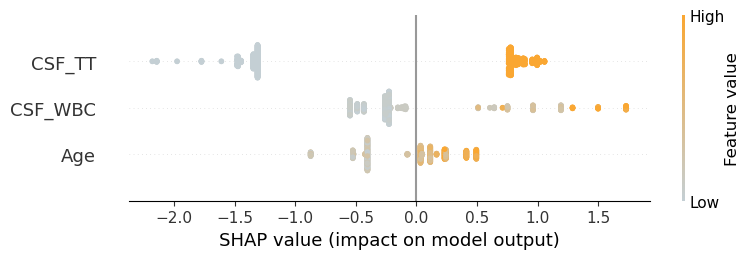

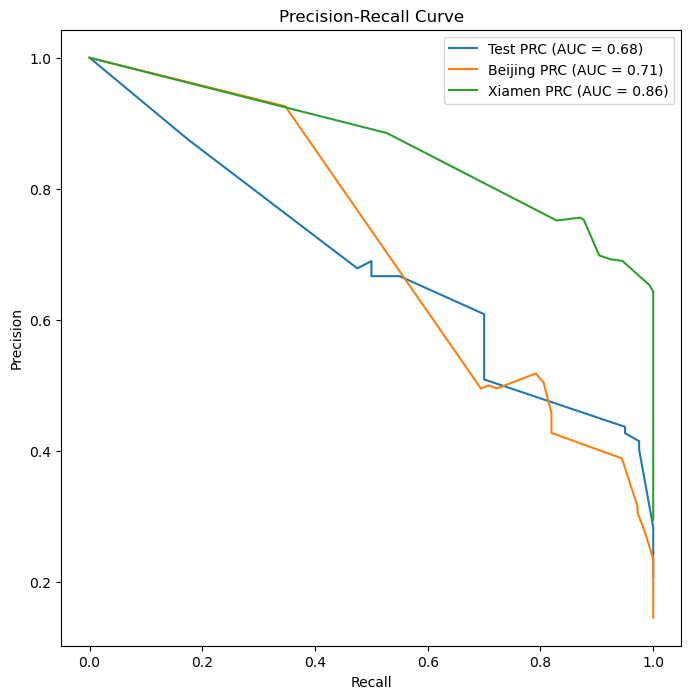

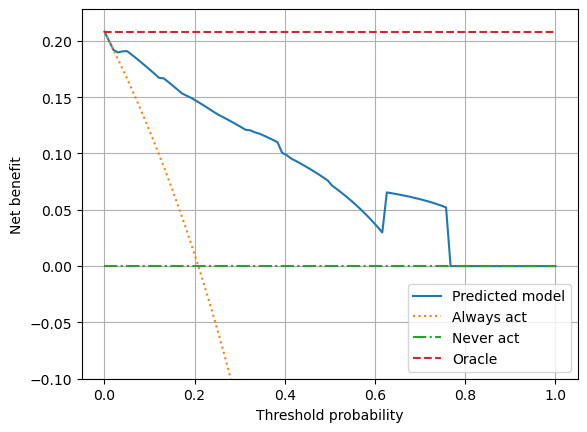

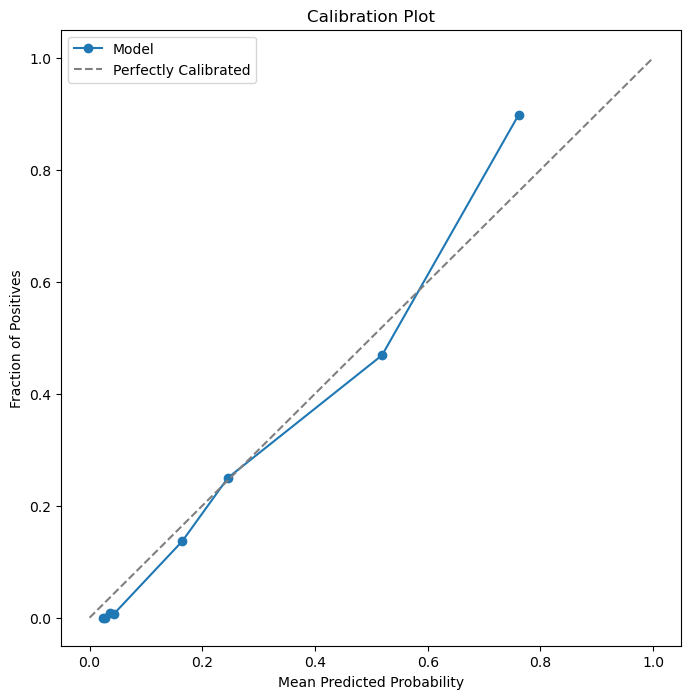

In [61]:
explainer = shap.TreeExplainer(bestmodel['classifier'])

observations = bestmodel.named_steps['preprocessor'].transform(guangzhou[x])

shap_values = explainer.shap_values(observations)


shap.summary_plot(shap_values, observations,
                 cmap=newCmap,feature_names=[re.search(r"__(.*)",var).group(1) 
                                             for var in bestmodel.named_steps['preprocessor'].get_feature_names_out() ])

precision, recall, _ = precision_recall_curve(y_test, y_test_pred_proba)
area_under_curve = auc(recall, precision)

bjprecision, bjrecall, _ = precision_recall_curve(beijing.CSF_NTT, beijing_pred_proba)
bj_area_under_curve = auc(bjrecall, bjprecision)

xiaprecision, xiarecall, _ = precision_recall_curve(xia.CSF_NTT, xia_pred_proba)
xia_area_under_curve = auc(xiarecall, xiaprecision)


plt.figure(figsize=(8, 8))
plt.plot(recall, precision, label=f'Test PRC (AUC = {area_under_curve:.2f})')
plt.plot(bjrecall, bjprecision, label=f'Beijing PRC (AUC = {bj_area_under_curve:.2f})')
plt.plot(xiarecall, xiaprecision, label=f'Xiamen PRC (AUC = {xia_area_under_curve:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

pred=bestmodel.predict_proba(mydata[x])[:, 1]
ax=plt.gca()
a=NetBenefitDisplay.from_predictions(mydata['CSF_NTT'], pred,                  #######
                                   name='Predicted model', show_references=True, ax=ax)
ax.set_ylim(-0.1, max(a.net_benefit)+0.02)
ax.grid(True)
ax.set_ylabel('Net benefit')
ax.legend(loc='lower right')
plt.show()

prob_true, prob_pred = calibration_curve(mydata['CSF_NTT'], pred, n_bins=10, strategy='quantile') #########

# 绘制校准图
plt.figure(figsize=(8, 8))
plt.plot(prob_pred, prob_true, marker='o', linestyle='-', label='Model')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')
plt.title('Calibration Plot')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.legend()
plt.show()

In [63]:
pd.DataFrame(
    {'threshold':a.threshold_probability,
     'benefit':a.net_benefit
    }
).to_excel(f'OneDrive - Lightning Life/MD/CSF_NTT_reduced_net_benefit.xlsx',index=False)

pd.DataFrame(
    {'probability true':prob_true,
     'probability prediction':prob_pred
    }
).to_excel(f'OneDrive - Lightning Life/MD/CSF_NTT_reduced_calibration.xlsx',index=False)

# Task 2

In [66]:
# remove uptodate 07-18-2025
mydata['score_sum']=mydata[['EURO2020','China2021','US2018'	,'Aust2022']].sum(axis=1)

In [68]:
mydata['all_scores']=np.where(mydata['score_sum']>=3,1,0)

In [70]:
guangzhou=mydata.loc[mydata.Location==3,:]
xia=mydata.loc[mydata.Location==2,:]
beijing=mydata.loc[mydata.Location==1,:]
guangzhou.reset_index(drop=True,inplace=True)
xia.reset_index(drop=True,inplace=True)
beijing.reset_index(drop=True,inplace=True)

In [72]:
mydata.head()

,ID,Sex,Age,Location,HIV,Serum_NTT,Serum_TT,CSF_NTT,CSF_TT,CSF_WBC,CSF_Protein,NS_Symptom,UpToDate,EURO2020,US2021,China2021,US2018,Aust2022,score_sum,all_scores
0,1,0,31,1,0,1,1,0,1,3.0,165.71,0,0,0,0,0,0,0,0,0
1,3,0,44,1,0,1,1,0,1,12.0,122.72,0,1,0,0,0,0,0,0,0
2,4,0,32,1,0,1,1,0,1,4.0,139.12,0,0,0,0,0,0,0,0,0
3,5,1,56,1,0,1,1,0,0,7.0,370.79,1,1,1,1,1,1,1,4,1
4,6,0,53,1,0,0,1,0,0,2.0,101.50,0,0,0,0,0,0,0,0,0


In [74]:
beijing.head()

,ID,Sex,Age,Location,HIV,Serum_NTT,Serum_TT,CSF_NTT,CSF_TT,CSF_WBC,CSF_Protein,NS_Symptom,UpToDate,EURO2020,US2021,China2021,US2018,Aust2022,score_sum,all_scores
0,1,0,31,1,0,1,1,0,1,3.0,165.71,0,0,0,0,0,0,0,0,0
1,3,0,44,1,0,1,1,0,1,12.0,122.72,0,1,0,0,0,0,0,0,0
2,4,0,32,1,0,1,1,0,1,4.0,139.12,0,0,0,0,0,0,0,0,0
3,5,1,56,1,0,1,1,0,0,7.0,370.79,1,1,1,1,1,1,1,4,1
4,6,0,53,1,0,0,1,0,0,2.0,101.50,0,0,0,0,0,0,0,0,0


In [76]:
x=['Age','CSF_TT','Sex','Serum_TT','Serum_NTT','CSF_NTT',
              'CSF_WBC','CSF_Protein','NS_Symptom']

In [78]:
hyperparameter = {
    'classifier__n_estimators': [20, 50,70,90,120,150], 
    'classifier__max_depth': [2, 3, 5], 
    'classifier__gamma': [0, 1, 5, 10], 
    'classifier__learning_rate': [0.1, 0.3,0.5,0.7, 1.0]
}

model_xgb_CSFNTT,x_train,y_train,x_test,y_test=mlmodel(data=guangzhou,x=x,hyperparameter=hyperparameter,
              y='all_scores',x_standard=['Age','CSF_WBC','CSF_Protein'],imbalanced=False,random_state=2024,
                         classifier='xgb',test_size=0.3)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


R[write to console]: Setting levels: control = 0, case = 1

R[write to console]: Setting direction: controls < cases

R[write to console]: Setting levels: control = 0, case = 1

R[write to console]: Setting direction: controls < cases

R[write to console]: Setting levels: control = 0, case = 1

R[write to console]: Setting direction: controls < cases

R[write to console]: Setting levels: control = 0, case = 1

R[write to console]: Setting direction: controls < cases



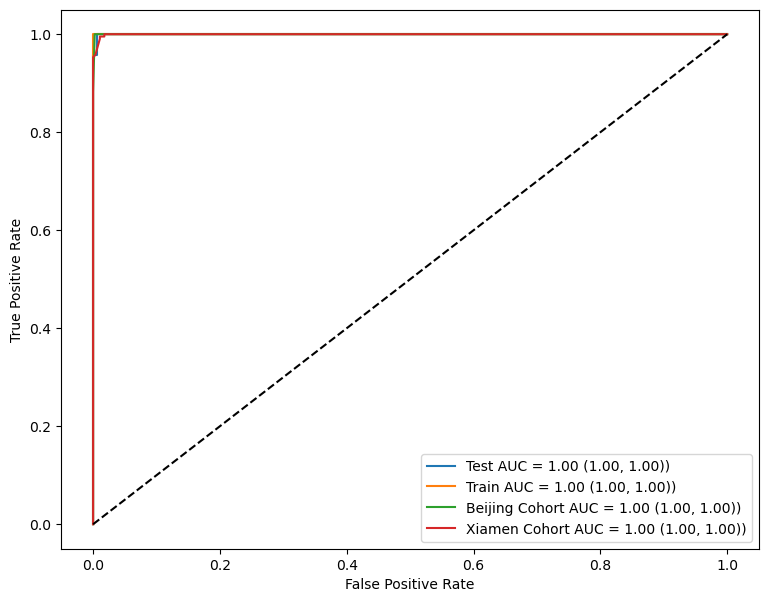

In [80]:

bestmodel=model_xgb_CSFNTT.best_estimator_
y_train_pred_proba = bestmodel.predict_proba(x_train)[:, 1]
y_test_pred_proba = bestmodel.predict_proba(x_test)[:, 1] 
beijing_pred_proba = bestmodel.predict_proba(beijing)[:, 1] 
xia_pred_proba = bestmodel.predict_proba(xia)[:, 1] 


y_train_pred = bestmodel.predict(x_train)
y_test_pred = bestmodel.predict(x_test)
beijing_pred = bestmodel.predict(beijing)
xia_pred = bestmodel.predict(xia)

auc_test = roc_auc_score(y_test, y_test_pred_proba)
auc_train = roc_auc_score(y_train, y_train_pred_proba)
auc_beijing = roc_auc_score(beijing.all_scores, beijing_pred_proba)
auc_xia = roc_auc_score(xia.all_scores, xia_pred_proba)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred_proba)
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred_proba)
fpr_beijing, tpr_beijing, thresholds_beijing = roc_curve(beijing.all_scores, beijing_pred_proba)
fpr_xia, tpr_xia, thresholds_xia = roc_curve(xia.all_scores, xia_pred_proba)

outcome='all_scores'
y_train_r = numpy2rpy(y_train)
y_test_r = numpy2rpy(y_test)
beijing_r = numpy2rpy(beijing[outcome])
xia_r = numpy2rpy(xia[outcome])

y_train_prob_r = numpy2rpy(y_train_pred_proba)
y_test_prob_r = numpy2rpy(y_test_pred_proba)
beijing_prob_r = numpy2rpy(beijing_pred_proba)
xia_prob_r = numpy2rpy(xia_pred_proba)

y_train_auc_ci = ro.r['calc_auc_ci'](y_train_r, y_train_prob_r)
y_test_auc_ci = ro.r['calc_auc_ci'](y_test_r, y_test_prob_r)
beijing_auc_ci = ro.r['calc_auc_ci'](beijing_r, beijing_prob_r)
xia_auc_ci = ro.r['calc_auc_ci'](xia_r, xia_prob_r)

plt.figure(figsize=[9,7])
plt.plot(fpr_test, tpr_test, label='Test AUC = %0.2f (%0.2f, %0.2f))' % (auc_test, y_test_auc_ci[0],y_test_auc_ci[2]))
plt.plot(fpr_train, tpr_train, label='Train AUC = %0.2f (%0.2f, %0.2f))' % (auc_train, y_train_auc_ci[0],y_train_auc_ci[2]))

plt.plot(fpr_beijing, tpr_beijing, label='Beijing Cohort AUC = %0.2f (%0.2f, %0.2f))' % 
         (auc_beijing, beijing_auc_ci[0],beijing_auc_ci[2]))
plt.plot(fpr_xia, tpr_xia, label='Xiamen Cohort AUC = %0.2f (%0.2f, %0.2f))' % 
         (auc_xia, xia_auc_ci[0],xia_auc_ci[2]))

plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title('CSF NTT ROC Curve')
plt.legend(loc='lower right')
plt.savefig('AUROC curve.jpg',dpi=300)

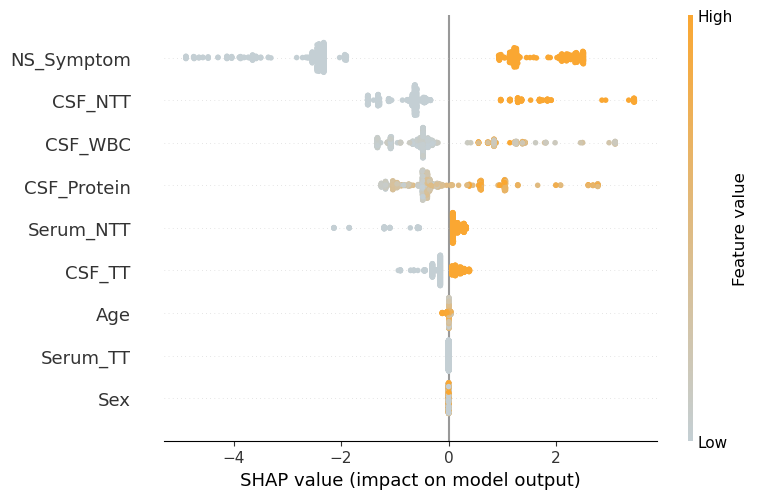

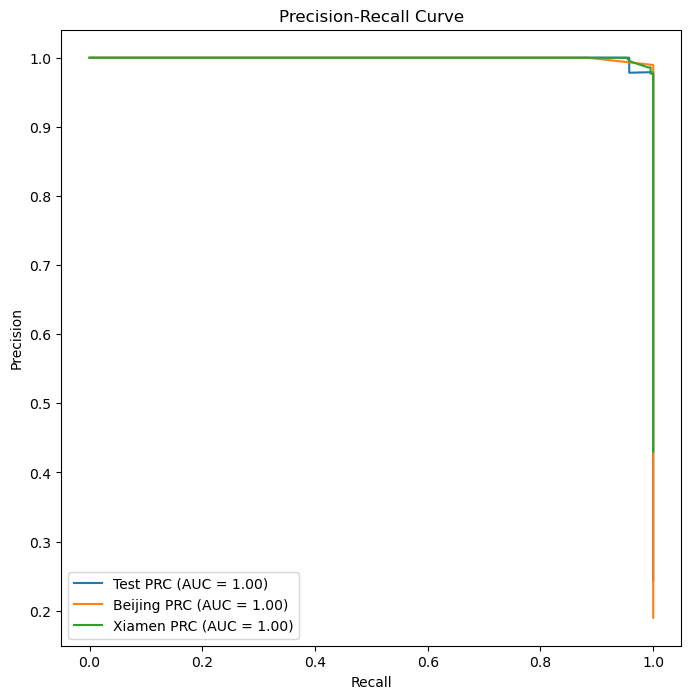

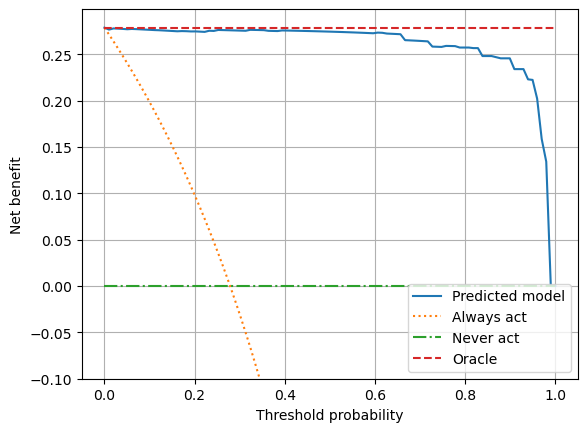

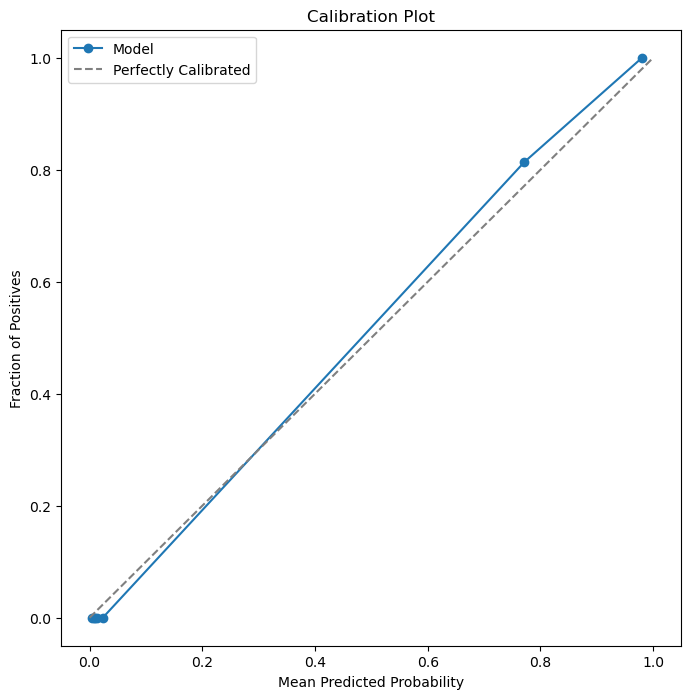

In [82]:
explainer = shap.TreeExplainer(bestmodel['classifier'])

observations = bestmodel.named_steps['preprocessor'].transform(guangzhou[x])

shap_values = explainer.shap_values(observations)


shap.summary_plot(shap_values, observations,
                 cmap=newCmap,feature_names=[re.search(r"__(.*)",var).group(1) 
                                             for var in bestmodel.named_steps['preprocessor'].get_feature_names_out() ])

precision, recall, _ = precision_recall_curve(y_test, y_test_pred_proba)
area_under_curve = auc(recall, precision)

bjprecision, bjrecall, _ = precision_recall_curve(beijing.all_scores, beijing_pred_proba)
bj_area_under_curve = auc(bjrecall, bjprecision)

xiaprecision, xiarecall, _ = precision_recall_curve(xia.all_scores, xia_pred_proba)
xia_area_under_curve = auc(xiarecall, xiaprecision)


plt.figure(figsize=(8, 8))
plt.plot(recall, precision, label=f'Test PRC (AUC = {area_under_curve:.2f})')
plt.plot(bjrecall, bjprecision, label=f'Beijing PRC (AUC = {bj_area_under_curve:.2f})')
plt.plot(xiarecall, xiaprecision, label=f'Xiamen PRC (AUC = {xia_area_under_curve:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

pred=bestmodel.predict_proba(mydata[x])[:, 1]
ax=plt.gca()
a=NetBenefitDisplay.from_predictions(mydata['all_scores'], pred,                  #######
                                   name='Predicted model', show_references=True, ax=ax)
ax.set_ylim(-0.1, max(a.net_benefit)+0.02)
ax.grid(True)
ax.set_ylabel('Net benefit')
ax.legend(loc='lower right')
plt.show()

prob_true, prob_pred = calibration_curve(mydata['all_scores'], pred, n_bins=10, strategy='quantile') #########

# 绘制校准图
plt.figure(figsize=(8, 8))
plt.plot(prob_pred, prob_true, marker='o', linestyle='-', label='Model')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')
plt.title('Calibration Plot')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.legend()
plt.show()

In [84]:
pd.DataFrame(
    {'threshold':a.threshold_probability,
     'benefit':a.net_benefit
    }
).to_excel(f'OneDrive - Lightning Life/MD/allscores_net_benefit.xlsx',index=False)

pd.DataFrame(
    {'probability true':prob_true,
     'probability prediction':prob_pred
    }
).to_excel(f'OneDrive - Lightning Life/MD/allscores_calibration.xlsx',index=False)

## Selected variables

In [87]:
x=['CSF_TT','NS_Symptom']

In [89]:
hyperparameter = {
    'classifier__n_estimators': [20, 50,70,90,120,150], 
    'classifier__max_depth': [2, 3, 5], 
    'classifier__gamma': [0, 1, 5, 10], 
    'classifier__learning_rate': [0.1, 0.3,0.5,0.7, 1.0]
}

model_xgb_CSFNTT,x_train,y_train,x_test,y_test=mlmodel(data=guangzhou,x=x,hyperparameter=hyperparameter,
              y='all_scores',x_standard=[],imbalanced=False,random_state=2024,
                         classifier='xgb',test_size=0.3)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


R[write to console]: Setting levels: control = 0, case = 1

R[write to console]: Setting direction: controls < cases

R[write to console]: Setting levels: control = 0, case = 1

R[write to console]: Setting direction: controls < cases

R[write to console]: Setting levels: control = 0, case = 1

R[write to console]: Setting direction: controls < cases

R[write to console]: Setting levels: control = 0, case = 1

R[write to console]: Setting direction: controls < cases



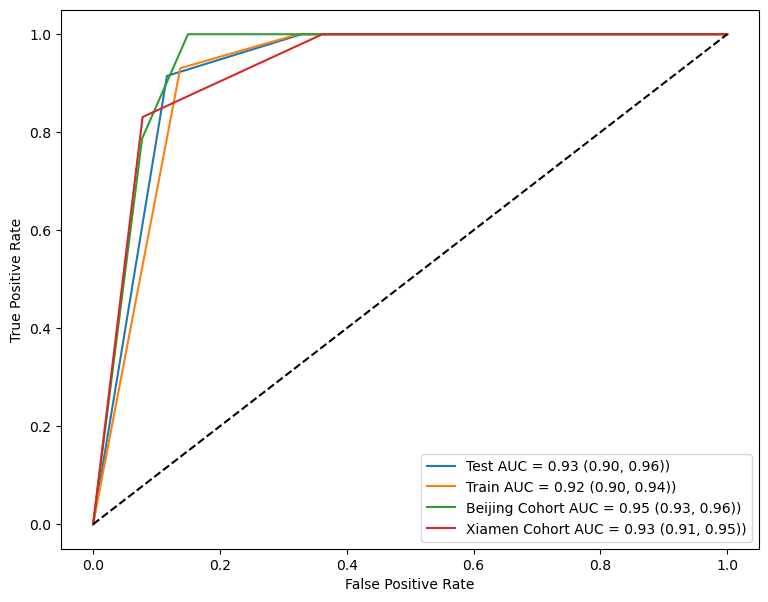

In [91]:

bestmodel=model_xgb_CSFNTT.best_estimator_
y_train_pred_proba = bestmodel.predict_proba(x_train)[:, 1]
y_test_pred_proba = bestmodel.predict_proba(x_test)[:, 1] 
beijing_pred_proba = bestmodel.predict_proba(beijing)[:, 1] 
xia_pred_proba = bestmodel.predict_proba(xia)[:, 1] 


y_train_pred = bestmodel.predict(x_train)
y_test_pred = bestmodel.predict(x_test)
beijing_pred = bestmodel.predict(beijing)
xia_pred = bestmodel.predict(xia)

auc_test = roc_auc_score(y_test, y_test_pred_proba)
auc_train = roc_auc_score(y_train, y_train_pred_proba)
auc_beijing = roc_auc_score(beijing.all_scores, beijing_pred_proba)
auc_xia = roc_auc_score(xia.all_scores, xia_pred_proba)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred_proba)
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred_proba)
fpr_beijing, tpr_beijing, thresholds_beijing = roc_curve(beijing.all_scores, beijing_pred_proba)
fpr_xia, tpr_xia, thresholds_xia = roc_curve(xia.all_scores, xia_pred_proba)

outcome='all_scores'
y_train_r = numpy2rpy(y_train)
y_test_r = numpy2rpy(y_test)
beijing_r = numpy2rpy(beijing[outcome])
xia_r = numpy2rpy(xia[outcome])

y_train_prob_r = numpy2rpy(y_train_pred_proba)
y_test_prob_r = numpy2rpy(y_test_pred_proba)
beijing_prob_r = numpy2rpy(beijing_pred_proba)
xia_prob_r = numpy2rpy(xia_pred_proba)

y_train_auc_ci = ro.r['calc_auc_ci'](y_train_r, y_train_prob_r)
y_test_auc_ci = ro.r['calc_auc_ci'](y_test_r, y_test_prob_r)
beijing_auc_ci = ro.r['calc_auc_ci'](beijing_r, beijing_prob_r)
xia_auc_ci = ro.r['calc_auc_ci'](xia_r, xia_prob_r)

plt.figure(figsize=[9,7])
plt.plot(fpr_test, tpr_test, label='Test AUC = %0.2f (%0.2f, %0.2f))' % (auc_test, y_test_auc_ci[0],y_test_auc_ci[2]))
plt.plot(fpr_train, tpr_train, label='Train AUC = %0.2f (%0.2f, %0.2f))' % (auc_train, y_train_auc_ci[0],y_train_auc_ci[2]))

plt.plot(fpr_beijing, tpr_beijing, label='Beijing Cohort AUC = %0.2f (%0.2f, %0.2f))' % 
         (auc_beijing, beijing_auc_ci[0],beijing_auc_ci[2]))
plt.plot(fpr_xia, tpr_xia, label='Xiamen Cohort AUC = %0.2f (%0.2f, %0.2f))' % 
         (auc_xia, xia_auc_ci[0],xia_auc_ci[2]))

plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title('CSF NTT ROC Curve')
plt.legend(loc='lower right')
plt.savefig('AUROC curve.jpg',dpi=300)

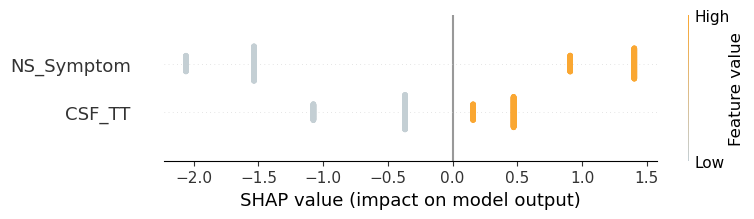

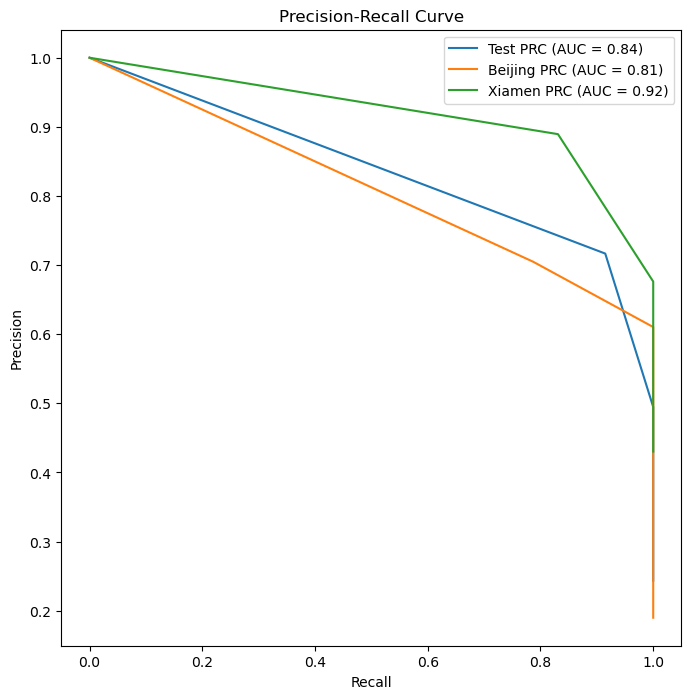

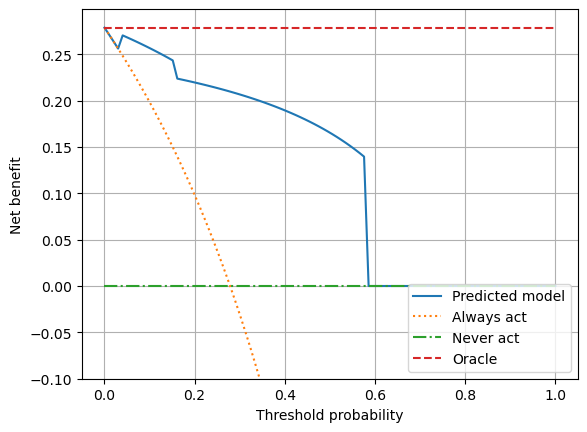

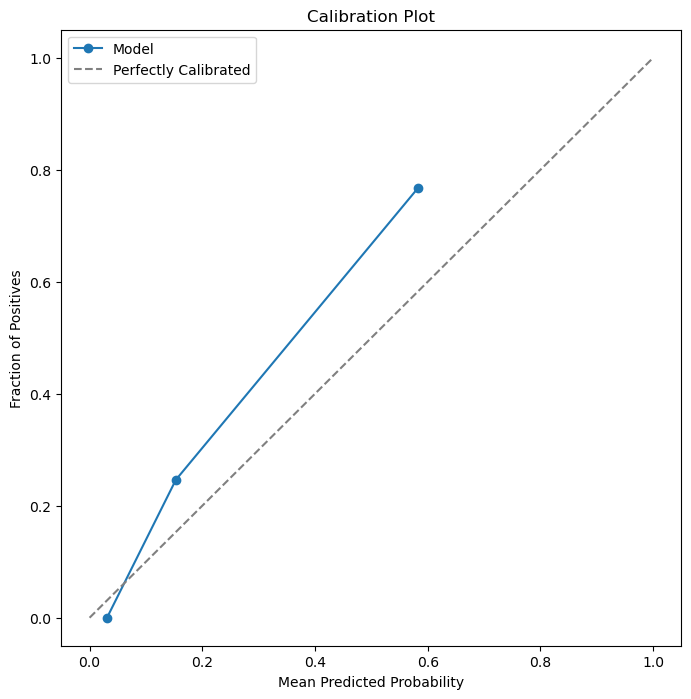

In [93]:
explainer = shap.TreeExplainer(bestmodel['classifier'])

observations = bestmodel.named_steps['preprocessor'].transform(guangzhou[x])

shap_values = explainer.shap_values(observations)


shap.summary_plot(shap_values, observations,
                 cmap=newCmap,feature_names=[re.search(r"__(.*)",var).group(1) 
                                             for var in bestmodel.named_steps['preprocessor'].get_feature_names_out() ])

precision, recall, _ = precision_recall_curve(y_test, y_test_pred_proba)
area_under_curve = auc(recall, precision)

bjprecision, bjrecall, _ = precision_recall_curve(beijing.all_scores, beijing_pred_proba)
bj_area_under_curve = auc(bjrecall, bjprecision)

xiaprecision, xiarecall, _ = precision_recall_curve(xia.all_scores, xia_pred_proba)
xia_area_under_curve = auc(xiarecall, xiaprecision)


plt.figure(figsize=(8, 8))
plt.plot(recall, precision, label=f'Test PRC (AUC = {area_under_curve:.2f})')
plt.plot(bjrecall, bjprecision, label=f'Beijing PRC (AUC = {bj_area_under_curve:.2f})')
plt.plot(xiarecall, xiaprecision, label=f'Xiamen PRC (AUC = {xia_area_under_curve:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

pred=bestmodel.predict_proba(mydata[x])[:, 1]
ax=plt.gca()
a=NetBenefitDisplay.from_predictions(mydata['all_scores'], pred,                  #######
                                   name='Predicted model', show_references=True, ax=ax)
ax.set_ylim(-0.1, max(a.net_benefit)+0.02)
ax.grid(True)
ax.set_ylabel('Net benefit')
ax.legend(loc='lower right')
plt.show()

prob_true, prob_pred = calibration_curve(mydata['all_scores'], pred, n_bins=10, strategy='quantile') #########

# 绘制校准图
plt.figure(figsize=(8, 8))
plt.plot(prob_pred, prob_true, marker='o', linestyle='-', label='Model')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')
plt.title('Calibration Plot')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.legend()
plt.show()

In [95]:
pd.DataFrame(
    {'threshold':a.threshold_probability,
     'benefit':a.net_benefit
    }
).to_excel(f'OneDrive - Lightning Life/MD/allscores_reduced_net_benefit.xlsx',index=False)

pd.DataFrame(
    {'probability true':prob_true,
     'probability prediction':prob_pred
    }
).to_excel(f'OneDrive - Lightning Life/MD/allscores_reduced_calibration.xlsx',index=False)

# Task 3

In [98]:
guangzhou.head()

,ID,Sex,Age,Location,HIV,Serum_NTT,Serum_TT,CSF_NTT,CSF_TT,CSF_WBC,CSF_Protein,NS_Symptom,UpToDate,EURO2020,US2021,China2021,US2018,Aust2022,score_sum,all_scores
0,1169,0,20,3,0,1,1,0,0,0.0,423.0,0,0,0,0,0,0,0,0,0
1,1173,0,51,3,0,1,1,0,0,1.0,262.0,0,0,0,0,0,0,0,0,0
2,1174,1,38,3,0,1,1,0,1,3.0,125.0,0,0,0,0,0,0,0,0,0
3,1175,1,60,3,0,1,1,0,1,1.9,375.0,1,1,0,0,0,1,1,2,0
4,1176,1,23,3,0,1,1,0,1,0.0,422.0,0,0,0,0,0,0,0,0,0


In [100]:
x=['Age','Sex','Serum_TT','Serum_NTT','CSF_NTT',
              'CSF_WBC','CSF_Protein','NS_Symptom']

In [102]:
hyperparameter = {
    'classifier__n_estimators': [20, 50,70,90,120,150], 
    'classifier__max_depth': [2, 3, 5], 
    'classifier__gamma': [0, 1, 5, 10], 
    'classifier__learning_rate': [0.1, 0.3,0.5,0.7, 1.0]
}

model_xgb_CSFTT,x_train,y_train,x_test,y_test=mlmodel(data=guangzhou,x=x,hyperparameter=hyperparameter,
              y='CSF_TT',x_standard=['CSF_WBC','Age','CSF_Protein'],imbalanced=False,random_state=2024,
                         classifier='xgb',test_size=0.3)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


R[write to console]: Setting levels: control = 0, case = 1

R[write to console]: Setting direction: controls < cases

R[write to console]: Setting levels: control = 0, case = 1

R[write to console]: Setting direction: controls < cases

R[write to console]: Setting levels: control = 0, case = 1

R[write to console]: Setting direction: controls < cases

R[write to console]: Setting levels: control = 0, case = 1

R[write to console]: Setting direction: controls < cases



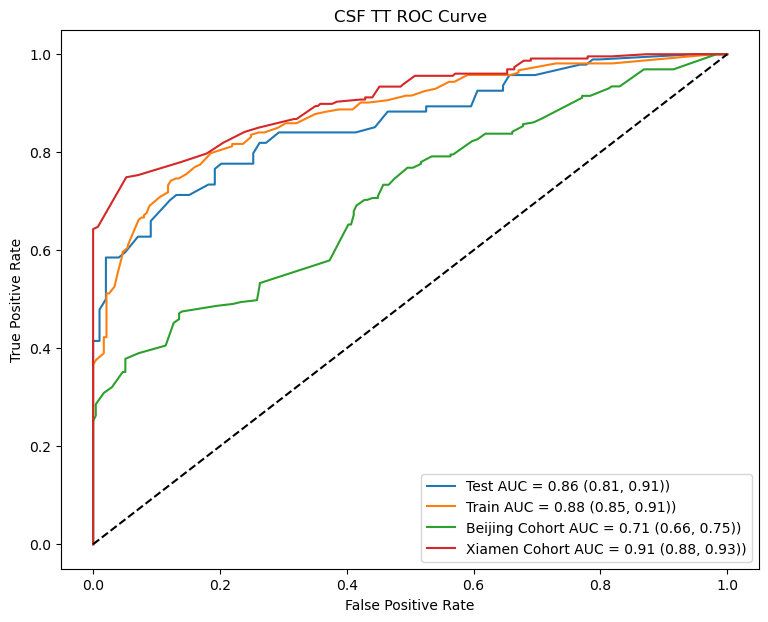

In [104]:

bestmodel=model_xgb_CSFTT.best_estimator_
y_train_pred_proba = bestmodel.predict_proba(x_train)[:, 1]
y_test_pred_proba = bestmodel.predict_proba(x_test)[:, 1] 
beijing_pred_proba = bestmodel.predict_proba(beijing)[:, 1] 
xia_pred_proba = bestmodel.predict_proba(xia)[:, 1] 


y_train_pred = bestmodel.predict(x_train)
y_test_pred = bestmodel.predict(x_test)
beijing_pred = bestmodel.predict(beijing)
xia_pred = bestmodel.predict(xia)

auc_test = roc_auc_score(y_test, y_test_pred_proba)
auc_train = roc_auc_score(y_train, y_train_pred_proba)
auc_beijing = roc_auc_score(beijing.CSF_TT, beijing_pred_proba)
auc_xia = roc_auc_score(xia.CSF_TT, xia_pred_proba)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred_proba)
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred_proba)
fpr_beijing, tpr_beijing, thresholds_beijing = roc_curve(beijing.CSF_TT, beijing_pred_proba)
fpr_xia, tpr_xia, thresholds_xia = roc_curve(xia.CSF_TT, xia_pred_proba)

outcome='CSF_TT'
y_train_r = numpy2rpy(y_train)
y_test_r = numpy2rpy(y_test)
beijing_r = numpy2rpy(beijing[outcome])
xia_r = numpy2rpy(xia[outcome])

y_train_prob_r = numpy2rpy(y_train_pred_proba)
y_test_prob_r = numpy2rpy(y_test_pred_proba)
beijing_prob_r = numpy2rpy(beijing_pred_proba)
xia_prob_r = numpy2rpy(xia_pred_proba)

y_train_auc_ci = ro.r['calc_auc_ci'](y_train_r, y_train_prob_r)
y_test_auc_ci = ro.r['calc_auc_ci'](y_test_r, y_test_prob_r)
beijing_auc_ci = ro.r['calc_auc_ci'](beijing_r, beijing_prob_r)
xia_auc_ci = ro.r['calc_auc_ci'](xia_r, xia_prob_r)

plt.figure(figsize=[9,7])
plt.plot(fpr_test, tpr_test, label='Test AUC = %0.2f (%0.2f, %0.2f))' % (auc_test, y_test_auc_ci[0],y_test_auc_ci[2]))
plt.plot(fpr_train, tpr_train, label='Train AUC = %0.2f (%0.2f, %0.2f))' % (auc_train, y_train_auc_ci[0],y_train_auc_ci[2]))

plt.plot(fpr_beijing, tpr_beijing, label='Beijing Cohort AUC = %0.2f (%0.2f, %0.2f))' % 
         (auc_beijing, beijing_auc_ci[0],beijing_auc_ci[2]))
plt.plot(fpr_xia, tpr_xia, label='Xiamen Cohort AUC = %0.2f (%0.2f, %0.2f))' % 
         (auc_xia, xia_auc_ci[0],xia_auc_ci[2]))

plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CSF TT ROC Curve')
plt.legend(loc='lower right')
plt.savefig('AUROC curve.jpg',dpi=300)

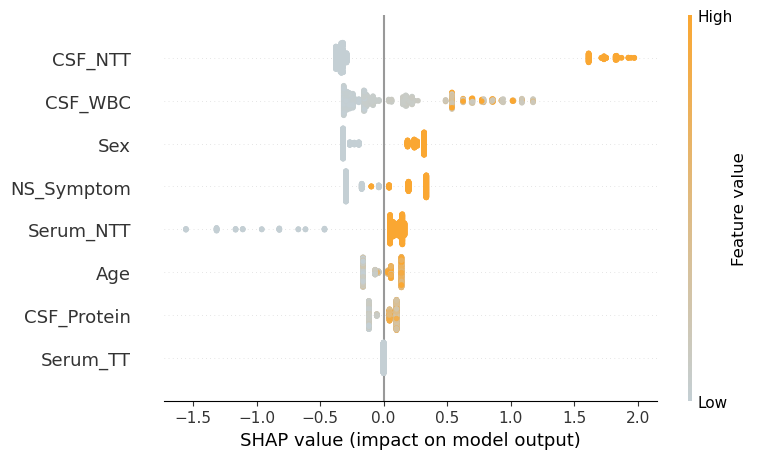

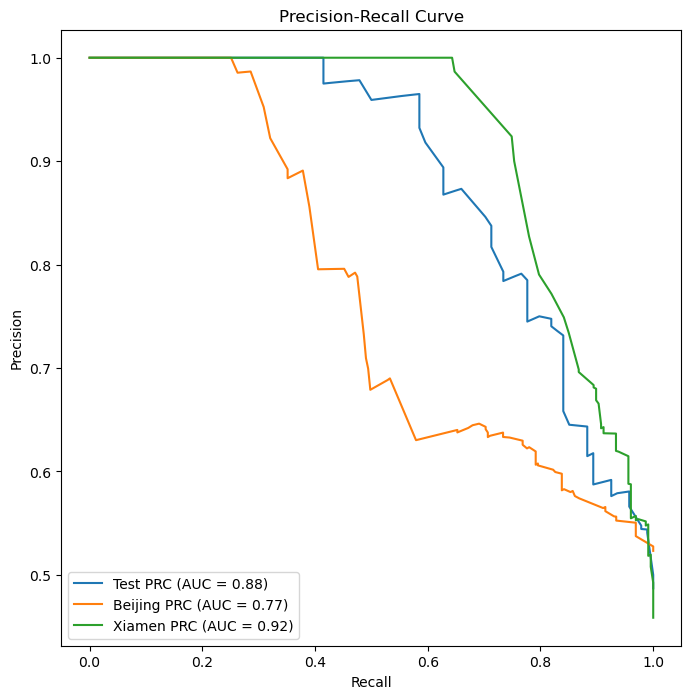

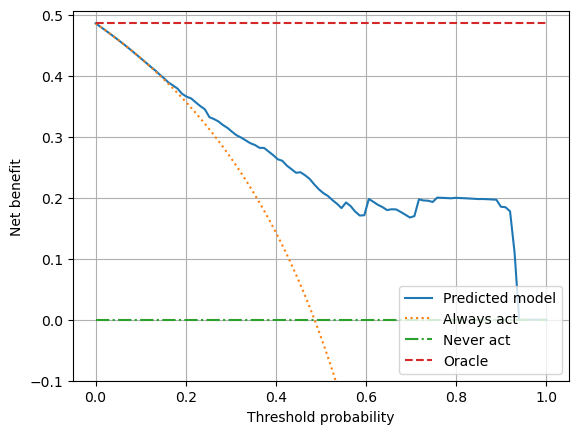

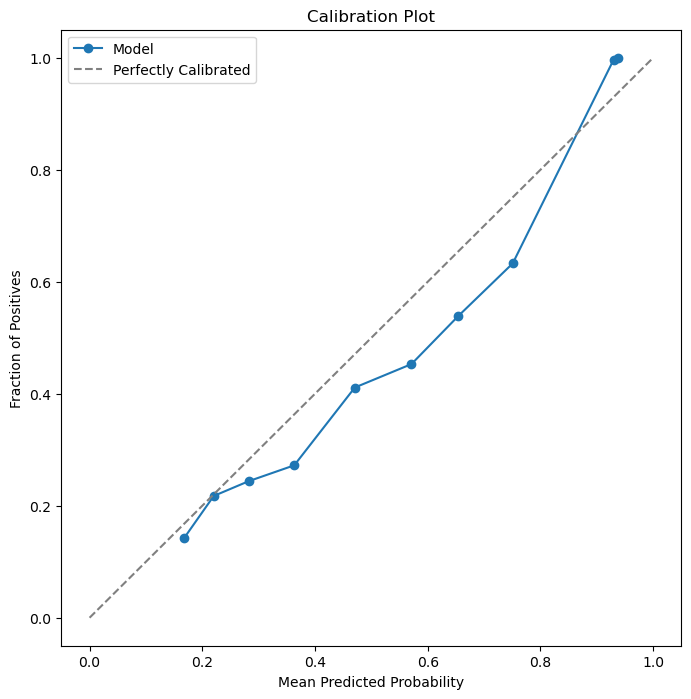

In [106]:
explainer = shap.TreeExplainer(bestmodel['classifier'])

observations = bestmodel.named_steps['preprocessor'].transform(guangzhou[x])

shap_values = explainer.shap_values(observations)


shap.summary_plot(shap_values, observations,
                 cmap=newCmap,feature_names=[re.search(r"__(.*)",var).group(1) 
                                             for var in bestmodel.named_steps['preprocessor'].get_feature_names_out() ])

precision, recall, _ = precision_recall_curve(y_test, y_test_pred_proba)
area_under_curve = auc(recall, precision)

bjprecision, bjrecall, _ = precision_recall_curve(beijing.CSF_TT, beijing_pred_proba)
bj_area_under_curve = auc(bjrecall, bjprecision)

xiaprecision, xiarecall, _ = precision_recall_curve(xia.CSF_TT, xia_pred_proba)
xia_area_under_curve = auc(xiarecall, xiaprecision)


plt.figure(figsize=(8, 8))
plt.plot(recall, precision, label=f'Test PRC (AUC = {area_under_curve:.2f})')
plt.plot(bjrecall, bjprecision, label=f'Beijing PRC (AUC = {bj_area_under_curve:.2f})')
plt.plot(xiarecall, xiaprecision, label=f'Xiamen PRC (AUC = {xia_area_under_curve:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

pred=bestmodel.predict_proba(mydata[x])[:, 1]
ax=plt.gca()
a=NetBenefitDisplay.from_predictions(mydata['CSF_TT'], pred,                  #######
                                   name='Predicted model', show_references=True, ax=ax)
ax.set_ylim(-0.1, max(a.net_benefit)+0.02)
ax.grid(True)
ax.set_ylabel('Net benefit')
ax.legend(loc='lower right')
plt.show()

prob_true, prob_pred = calibration_curve(mydata['CSF_TT'], pred, n_bins=10, strategy='quantile') #########

# 绘制校准图
plt.figure(figsize=(8, 8))
plt.plot(prob_pred, prob_true, marker='o', linestyle='-', label='Model')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')
plt.title('Calibration Plot')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.legend()
plt.show()

## Selected variables

In [109]:
x=['CSF_NTT','Sex','CSF_WBC','NS_Symptom']

In [111]:
hyperparameter = {
    'classifier__n_estimators': [20, 50,70,90,120,150], 
    'classifier__max_depth': [2, 3, 5], 
    'classifier__gamma': [0, 1, 5, 10], 
    'classifier__learning_rate': [0.1, 0.3,0.5,0.7, 1.0]
}

model_xgb_CSFTT,x_train,y_train,x_test,y_test=mlmodel(data=guangzhou,x=x,hyperparameter=hyperparameter,
              y='CSF_TT',x_standard=['CSF_WBC'],imbalanced=False,random_state=2024,
                         classifier='xgb',test_size=0.3)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


R[write to console]: Setting levels: control = 0, case = 1

R[write to console]: Setting direction: controls < cases

R[write to console]: Setting levels: control = 0, case = 1

R[write to console]: Setting direction: controls < cases

R[write to console]: Setting levels: control = 0, case = 1

R[write to console]: Setting direction: controls < cases

R[write to console]: Setting levels: control = 0, case = 1

R[write to console]: Setting direction: controls < cases



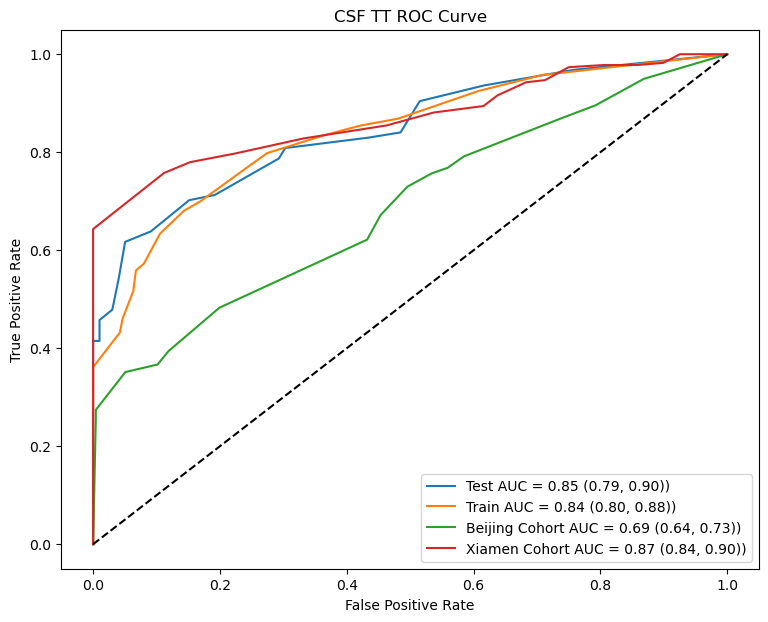

In [113]:

bestmodel=model_xgb_CSFTT.best_estimator_
y_train_pred_proba = bestmodel.predict_proba(x_train)[:, 1]
y_test_pred_proba = bestmodel.predict_proba(x_test)[:, 1] 
beijing_pred_proba = bestmodel.predict_proba(beijing)[:, 1] 
xia_pred_proba = bestmodel.predict_proba(xia)[:, 1] 


y_train_pred = bestmodel.predict(x_train)
y_test_pred = bestmodel.predict(x_test)
beijing_pred = bestmodel.predict(beijing)
xia_pred = bestmodel.predict(xia)

auc_test = roc_auc_score(y_test, y_test_pred_proba)
auc_train = roc_auc_score(y_train, y_train_pred_proba)
auc_beijing = roc_auc_score(beijing.CSF_TT, beijing_pred_proba)
auc_xia = roc_auc_score(xia.CSF_TT, xia_pred_proba)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred_proba)
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred_proba)
fpr_beijing, tpr_beijing, thresholds_beijing = roc_curve(beijing.CSF_TT, beijing_pred_proba)
fpr_xia, tpr_xia, thresholds_xia = roc_curve(xia.CSF_TT, xia_pred_proba)

outcome='CSF_TT'
y_train_r = numpy2rpy(y_train)
y_test_r = numpy2rpy(y_test)
beijing_r = numpy2rpy(beijing[outcome])
xia_r = numpy2rpy(xia[outcome])

y_train_prob_r = numpy2rpy(y_train_pred_proba)
y_test_prob_r = numpy2rpy(y_test_pred_proba)
beijing_prob_r = numpy2rpy(beijing_pred_proba)
xia_prob_r = numpy2rpy(xia_pred_proba)

y_train_auc_ci = ro.r['calc_auc_ci'](y_train_r, y_train_prob_r)
y_test_auc_ci = ro.r['calc_auc_ci'](y_test_r, y_test_prob_r)
beijing_auc_ci = ro.r['calc_auc_ci'](beijing_r, beijing_prob_r)
xia_auc_ci = ro.r['calc_auc_ci'](xia_r, xia_prob_r)

plt.figure(figsize=[9,7])
plt.plot(fpr_test, tpr_test, label='Test AUC = %0.2f (%0.2f, %0.2f))' % (auc_test, y_test_auc_ci[0],y_test_auc_ci[2]))
plt.plot(fpr_train, tpr_train, label='Train AUC = %0.2f (%0.2f, %0.2f))' % (auc_train, y_train_auc_ci[0],y_train_auc_ci[2]))

plt.plot(fpr_beijing, tpr_beijing, label='Beijing Cohort AUC = %0.2f (%0.2f, %0.2f))' % 
         (auc_beijing, beijing_auc_ci[0],beijing_auc_ci[2]))
plt.plot(fpr_xia, tpr_xia, label='Xiamen Cohort AUC = %0.2f (%0.2f, %0.2f))' % 
         (auc_xia, xia_auc_ci[0],xia_auc_ci[2]))

plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CSF TT ROC Curve')
plt.legend(loc='lower right')
plt.savefig('AUROC curve.jpg',dpi=300)

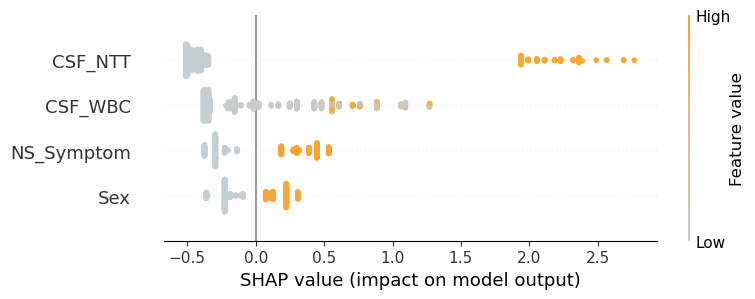

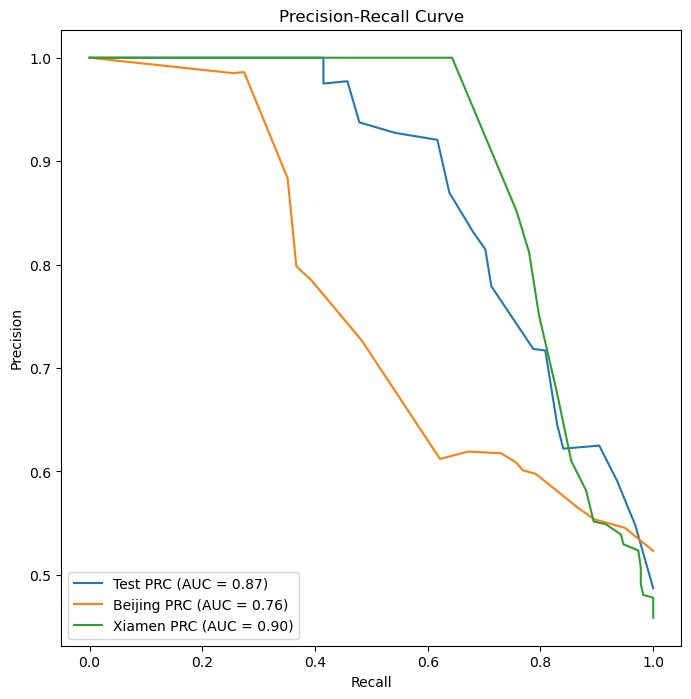

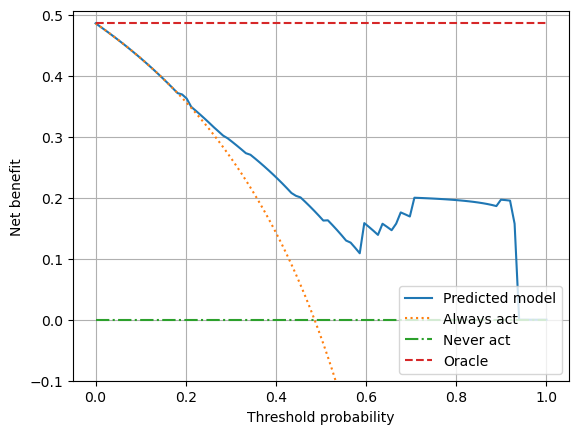

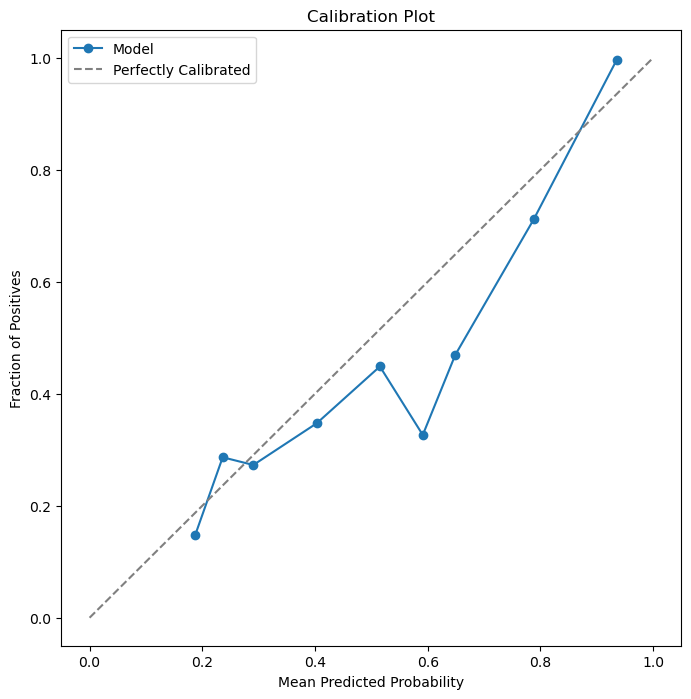

In [115]:
explainer = shap.TreeExplainer(bestmodel['classifier'])

observations = bestmodel.named_steps['preprocessor'].transform(guangzhou[x])

shap_values = explainer.shap_values(observations)


shap.summary_plot(shap_values, observations,
                 cmap=newCmap,feature_names=[re.search(r"__(.*)",var).group(1) 
                                             for var in bestmodel.named_steps['preprocessor'].get_feature_names_out() ])

precision, recall, _ = precision_recall_curve(y_test, y_test_pred_proba)
area_under_curve = auc(recall, precision)

bjprecision, bjrecall, _ = precision_recall_curve(beijing.CSF_TT, beijing_pred_proba)
bj_area_under_curve = auc(bjrecall, bjprecision)

xiaprecision, xiarecall, _ = precision_recall_curve(xia.CSF_TT, xia_pred_proba)
xia_area_under_curve = auc(xiarecall, xiaprecision)


plt.figure(figsize=(8, 8))
plt.plot(recall, precision, label=f'Test PRC (AUC = {area_under_curve:.2f})')
plt.plot(bjrecall, bjprecision, label=f'Beijing PRC (AUC = {bj_area_under_curve:.2f})')
plt.plot(xiarecall, xiaprecision, label=f'Xiamen PRC (AUC = {xia_area_under_curve:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

pred=bestmodel.predict_proba(mydata[x])[:, 1]
ax=plt.gca()
a=NetBenefitDisplay.from_predictions(mydata['CSF_TT'], pred,                  #######
                                   name='Predicted model', show_references=True, ax=ax)
ax.set_ylim(-0.1, max(a.net_benefit)+0.02)
ax.grid(True)
ax.set_ylabel('Net benefit')
ax.legend(loc='lower right')
plt.show()

prob_true, prob_pred = calibration_curve(mydata['CSF_TT'], pred, n_bins=10, strategy='quantile') #########

# 绘制校准图
plt.figure(figsize=(8, 8))
plt.plot(prob_pred, prob_true, marker='o', linestyle='-', label='Model')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')
plt.title('Calibration Plot')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.legend()
plt.show()

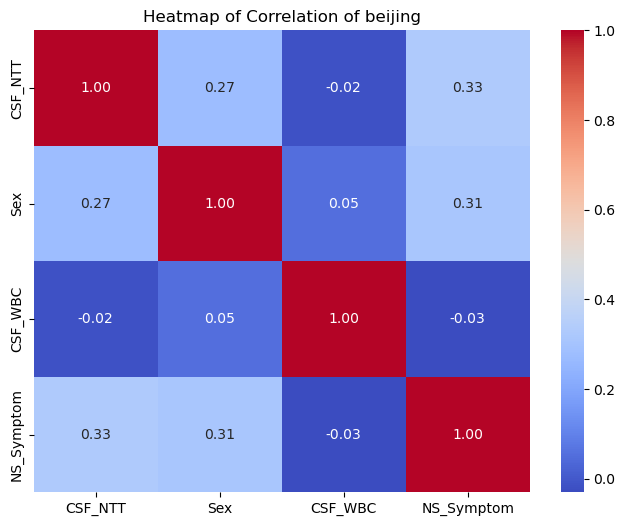

In [117]:
corr_matrix = beijing[x].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation of beijing')
plt.show()

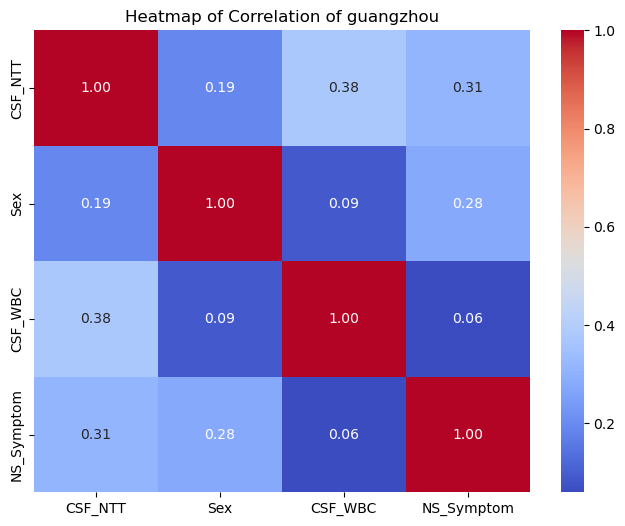

In [119]:
corr_matrix = guangzhou[x].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation of guangzhou')
plt.show()